In [ ]:
!pip install -q tfds-nightly tensorflow matplotlib

     |████████████████████████████████| 3.6MB 3.4MB/s 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

In [ ]:
df_train , info = tfds.load('goemotions', split='train', with_info=True)

df_test , info_test = tfds.load('goemotions', split='validation', with_info=True)


Shuffling and writing examples to /root/tensorflow_datasets/goemotions/0.1.0.incompleteMYZDAT/goemotions-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/goemotions/0.1.0.incompleteMYZDAT/goemotions-validation.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/goemotions/0.1.0.incompleteMYZDAT/goemotions-test.tfrecord


Dataset goemotions downloaded and prepared to /root/tensorflow_datasets/goemotions/0.1.0. Subsequent calls will reuse this data.


In [ ]:
train_df=tfds.as_dataframe(df_train, info)
test_df=tfds.as_dataframe(df_test, info_test)

In [ ]:
train_df.sample(5)

,admiration,amusement,anger,annoyance,approval,caring,comment_text,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,neutral,optimism,pride,realization,relief,remorse,sadness,surprise
33700,False,False,False,False,False,False,b'I had an urge today. Went straight to the gy...,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
33460,False,False,True,False,False,False,b'[NAME] BREAK THE GAME. WHY HAVE YOU GIVEN AL...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29485,False,False,False,True,False,False,b'Where did I say that happened? Lmao most of ...,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
37627,False,False,False,False,False,False,"b'Season park, was 2 summers ago!! '",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
32010,False,False,False,False,False,False,b'Other teams on power plays: relentless shoot...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [ ]:
cols_target = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
      'confusion', 'curiosity', 'desire', 'disappointment',
       'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
       'gratitude', 'grief', 'joy', 'love', 'nervousness', 'neutral',
       'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness',
       'surprise']

In [ ]:
train_df.describe()

,admiration,amusement,anger,annoyance,approval,caring,comment_text,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,neutral,optimism,pride,realization,relief,remorse,sadness,surprise
count,43410,43410,43410,43410,43410,43410,43410,43410,43410,43410,43410,43410,43410,43410,43410,43410,43410,43410,43410,43410,43410,43410,43410,43410,43410,43410,43410,43410,43410
unique,2,2,2,2,2,2,43227,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,b'Thank you.',False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,39280,41082,41843,40940,40471,42323,13,42042,41219,42769,42141,41388,42617,43107,42557,42814,40748,43333,41958,41324,43246,29191,41829,43299,42300,43257,42865,42084,42350


In [ ]:
print('Total rows in test is {}'.format(len(test_df)))
print('Total rows in train is {}'.format(len(train_df)))
print(train_df[cols_target].sum())

Total rows in test is 5426
Total rows in train is 43410
admiration         4130
amusement          2328
anger              1567
annoyance          2470
approval           2939
caring             1087
confusion          1368
curiosity          2191
desire              641
disappointment     1269
disapproval        2022
disgust             793
embarrassment       303
excitement          853
fear                596
gratitude          2662
grief                77
joy                1452
love               2086
nervousness         164
neutral           14219
optimism           1581
pride               111
realization        1110
relief              153
remorse             545
sadness            1326
surprise           1060
dtype: int64


In [ ]:
train_df.comment_text =train_df.comment_text.apply(lambda row:tf.compat.as_str_any (row))

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re

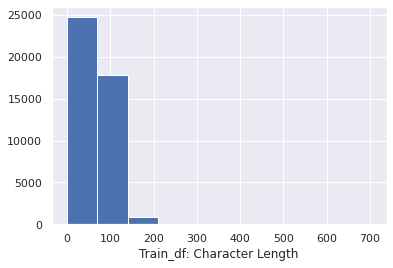

In [ ]:

# Let's look at the character length for the rows in the training data and record these
train_df['char_length'] = train_df['comment_text'].apply(lambda x: len(str(x)))
# look at the histogram plot for text length
sns.set()
train_df['char_length'].hist()
plt.xlabel("Train_df: Character Length")
plt.show()


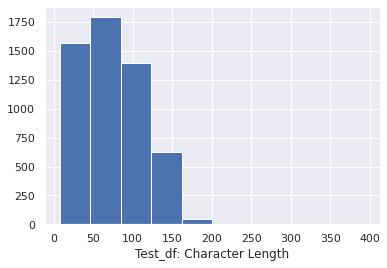

In [ ]:
# Let's look at the character length for the rows in the training data and record these
test_df['char_length'] = test_df['comment_text'].apply(lambda x: len(str(x)))
# look at the histogram plot for text length
sns.set()
test_df['char_length'].hist()
plt.xlabel("Test_df: Character Length")
plt.show()


**Clean up the Comments**

In [ ]:

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text) # Removing the escape sequences.
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ') # Removing extra space at the end.
    text = text.lower() # # lowercase to avoid difference between 'hate', 'HaTe'
    return text

In [ ]:
# clean the comment_text in train_df
cleaned_train_comment = []
for i in range(0,len(train_df)):
    cleaned_comment = clean_text(train_df['comment_text'][i])
    cleaned_train_comment.append(cleaned_comment)
train_df['comment_text'] = pd.Series(cleaned_train_comment).astype(str)

Define X from entire train & test data for use in tokenization by Vectorizer

In [ ]:
train_df = train_df.drop('char_length',axis=1)

In [ ]:
X = train_df.comment_text
test_X = test_df.comment_text

In [ ]:
print(X.shape, test_X.shape)

(43410,) (5426,)


Vectorize The Data

In [ ]:
# import and instantiate TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=5000,stop_words='english')
print(vect)

# learn the vocabulary in the training data, then use it to create a document-term matrix
X_dtm = vect.fit_transform(X)
# examine the document-term matrix created from X_train
X_dtm

# transform the test data using the earlier fitted vocabulary, into a document-term matrix
test_X_dtm = vect.transform(test_X)
# examine the document-term matrix from X_test
test_X_dtm

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)


<5426x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 25509 stored elements in Compressed Sparse Row format>

Binary Relevance

In [ ]:
# import and instantiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
logreg = LogisticRegression(C=12.0,max_iter=5000)


In [ ]:
for label in cols_target:
    print('... Processing {}'.format(label))
    y = train_df[label]
    # train the model using X_dtm & y
    logreg.fit(X_dtm, y)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_dtm)
    #print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    print('Training f1-score is {}'.format(f1_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]

... Processing admiration
Training f1-score is 0.7104301377565364
... Processing amusement
Training f1-score is 0.8382853254706282
... Processing anger
Training f1-score is 0.5537542662116041
... Processing annoyance
Training f1-score is 0.3058064516129032
... Processing approval
Training f1-score is 0.29810298102981025
... Processing caring
Training f1-score is 0.3818815331010453
... Processing confusion
Training f1-score is 0.29259482239614687
... Processing curiosity
Training f1-score is 0.20756234915526953
... Processing desire
Training f1-score is 0.5855670103092784
... Processing disappointment
Training f1-score is 0.2612137203166227
... Processing disapproval
Training f1-score is 0.20163020163020162
... Processing disgust
Training f1-score is 0.5892255892255892
... Processing embarrassment
Training f1-score is 0.6069868995633189
... Processing excitement
Training f1-score is 0.41161400512382584
... Processing fear
Training f1-score is 0.7355864811133203
... Processing gratitude


Classifier Chains - build a multi-label classifier using Logistic Regression

In [ ]:
submission_chains= pd.DataFrame(columns=['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
      'confusion', 'curiosity', 'desire', 'disappointment',
       'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
       'gratitude', 'grief', 'joy', 'love', 'nervousness', 'neutral',
       'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness',
       'surprise'])

In [ ]:
# create a function to add features
def add_feature(X, feature_to_add):
    '''
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    '''
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [ ]:
for label in cols_target:
    print('... Processing {}'.format(label))
    y = train_df[label]
    # train the model using X_dtm & y
    logreg.fit(X_dtm,y)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_dtm)
    #print('Training Accuracy is {}'.format(accuracy_score(y,y_pred_X)))
    print('Training f1_score is {}'.format(f1_score(y, y_pred_X)))
    
    # make predictions from test_X
    test_y = logreg.predict(test_X_dtm)
    test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
    submission_chains[label] = test_y_prob
    # chain current label to X_dtm
    X_dtm = add_feature(X_dtm, y)
    print('Shape of X_dtm is now {}'.format(X_dtm.shape))
    # chain current label predictions to test_X_dtm
    test_X_dtm = add_feature(test_X_dtm, test_y)
    print('Shape of test_X_dtm is now {}'.format(test_X_dtm.shape))

... Processing admiration
Training f1_score is 0.7104301377565364
Shape of X_dtm is now (43410, 5001)
Shape of test_X_dtm is now (5426, 5001)
... Processing amusement
Training f1_score is 0.8373466606088141
Shape of X_dtm is now (43410, 5002)
Shape of test_X_dtm is now (5426, 5002)
... Processing anger
Training f1_score is 0.559559135226791
Shape of X_dtm is now (43410, 5003)
Shape of test_X_dtm is now (5426, 5003)
... Processing annoyance
Training f1_score is 0.3205863607393244
Shape of X_dtm is now (43410, 5004)
Shape of test_X_dtm is now (5426, 5004)
... Processing approval
Training f1_score is 0.3145464304884594
Shape of X_dtm is now (43410, 5005)
Shape of test_X_dtm is now (5426, 5005)
... Processing caring
Training f1_score is 0.40383299110198495
Shape of X_dtm is now (43410, 5006)
Shape of test_X_dtm is now (5426, 5006)
... Processing confusion
Training f1_score is 0.33761682242990654
Shape of X_dtm is now (43410, 5007)
Shape of test_X_dtm is now (5426, 5007)
... Processing curi

In [ ]:
submission_chains.sample(10)

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,neutral,optimism,pride,realization,relief,remorse,sadness,surprise
661,0.322042,0.042732,0.001320,0.005321,0.212773,0.001884,0.004757,0.093177,0.000419,0.056657,0.005521,0.002112,0.000949,0.068048,0.001132,0.018574,0.001688,0.007004,0.001369,0.000395,0.086612,0.008106,0.002108,0.031577,0.002394,0.002139,0.000595,0.993322
1997,0.004527,0.005643,0.002381,0.016864,0.017003,0.016203,0.094794,0.033957,0.001290,0.000595,0.010307,0.006048,0.000497,0.001334,0.000059,0.953804,0.000280,0.000771,0.000738,0.000030,0.001881,0.085985,0.001300,0.031649,0.005200,0.017009,0.000278,0.001036
4061,0.003930,0.002773,0.185093,0.108885,0.003176,0.013524,0.169972,0.009004,0.001186,0.013098,0.034720,0.001013,0.009403,0.001073,0.016932,0.001323,0.000251,0.009709,0.030340,0.003705,0.956529,0.000173,0.000052,0.000195,0.000313,0.000010,0.002616,0.004043
2938,0.017837,0.000887,0.002447,0.002108,0.019375,0.013008,0.001635,0.008036,0.033193,0.002609,0.002596,0.000858,0.000284,0.016416,0.000298,0.000573,0.000365,0.010463,0.999148,0.000127,0.017892,0.000500,0.000107,0.005903,0.000261,0.000165,0.001209,0.000584
3366,0.132759,0.003438,0.487196,0.488731,0.016911,0.006629,0.013027,0.029745,0.000580,0.006460,0.061434,0.008201,0.000577,0.001426,0.000827,0.000200,0.000447,0.055416,0.028249,0.000736,0.780833,0.012311,0.000084,0.002971,0.000362,0.000010,0.002107,0.015004
5207,0.001596,0.019211,0.004447,0.019098,0.040456,0.003553,0.007210,0.118519,0.000352,0.001825,0.170480,0.002144,0.000365,0.000713,0.000250,0.000327,0.000148,0.004803,0.002514,0.002001,0.975673,0.000565,0.000069,0.001616,0.000105,0.000247,0.001514,0.002440
3047,0.993669,0.003595,0.000152,0.000429,0.037294,0.002190,0.025055,0.013972,0.002852,0.010931,0.003456,0.000283,0.000110,0.000420,0.000440,0.002944,0.000038,0.013120,0.000560,0.000267,0.028365,0.004833,0.000403,0.006552,0.000383,0.000537,0.001713,0.000436
4727,0.013235,0.002615,0.108187,0.236486,0.053825,0.004778,0.006346,0.022703,0.035690,0.005459,0.542354,0.024803,0.000255,0.001032,0.000114,0.000394,0.000031,0.001374,0.027591,0.000264,0.029681,0.024817,0.000301,0.004998,0.001486,0.000585,0.002836,0.001086
4919,0.001484,0.002803,0.002413,0.020677,0.087220,0.000450,0.949201,0.104040,0.000354,0.001679,0.004917,0.000681,0.000212,0.000363,0.003166,0.002128,0.000055,0.012680,0.001694,0.000744,0.093761,0.002060,0.000060,0.001272,0.000431,0.002443,0.000743,0.011987
4378,0.010772,0.890749,0.000702,0.011784,0.062551,0.004080,0.003301,0.005190,0.000539,0.000223,0.026700,0.016259,0.000319,0.006555,0.000016,0.001703,0.000012,0.089789,0.005606,0.000181,0.011887,0.001911,0.000306,0.021075,0.006804,0.001048,0.000686,0.000386
